# Background 
Databases are an important part of both Software Engineering and Data Science as they provide a solid option for storing and managing our data.

Unlike text file or CSV file, databases allow us to more security store our data and provide measures to make sure that our data is consistent (when talking about tabular and SQL databases). 

Think of all of the possible points of failure when storing your data in a file, the file can easily be read, modified and deleted without any special tools. 

Because of their many issues, text files are not a good or scaleable solution for storing data, this is where databases come into play.

### As Software engineers

As a software engineer, you want to make sure that the data you are working with is consistent, easy to access for those who should be able to access it and inaccessible for those who should not be able to access it.

As a software engineer, you will mainly use database to store information that needs to be accessible whenever the application is run. Databases can be used for storing customer details if you are creating an e-commerce site, posts if you are creating a social media application and much more.

As a developer in the modern day, you will mainly be connecting your applications to cloud based databases solutions allowing the same information to be shared between different instances of the same application, but as we will see in this notebook, this is not too different from connecting to a database locally.

### Data Science

As a data scientist, there are instances where you might need to work with databases, you might be performing queries on large amounts of data and need to query multiple different tables at the same time for your analysis, in this case, using SQL would be the best option (with read access only), but this is out of scope for what we want to do. 

Another instance would be when you are working on a team where all of the data that needs to be analyzed is stored in a database and there is no API for getting data, or any API that accesses data doesn't fit your ever-changing needs. Connecting directly to the database (with read access only) would be the best choice to allow you to perform the operations that you need.

As a data scientist working with SQL databases in particular, you can trust that the data you are working with is mostly clean and error free assuming that the data engineers have set up the right measures to ensure data integrity, reducing the amount of work that you would need to do.

# Purpose

In this notebook, we will be going through the different ways we can interact with SQL within our Python environment. We will mainly focus on using the built in sqlite3 module in Python, but we will also take a look at how we can connect to local or cloud databases within Python, and how we can access databases in Pandas

### Notes

We will be going over tabular databases that make use of SQL for querying the data stored in the database for this notebook.

Creating connections to No-SQL databases would have a similar setup process (with different modules) but would make use of different approaches for querying and working with the data.

# SQLite

In this section, we will go over SQLite and how to use it in Python.

SQLite is a good option to get us started with working with databases in our applications as it comes standard with Python so there is no need to install any additional packages.

Side note, SQLite also comes installed on Android devices, so most applications that stored data locally on your device are using SQLite.

### What is SQLite

As the name suggest, SQLite is a lightweight SQL database. Unlike other SQL databases, it does not require a server to run making the install size very small at about 500kbs.

Other than the size and lack of complex configuration required to use SQLite, all of it’s benefits other benefits are also weaknesses when compared to other SQL databases.

**Benefits (Weaknesses)**

- **Self-contained** - SQLite databases run locally on the machine that will directly access the database, the database is usually stored in the project file and used by a single application. This makes it a good solution for storing local data in a more managed way than using files, but means that sharing data between applications is not possible, (unless you get creative).
- **Serverless** - Most databases require servers to run, these usually take up a lot of resources and need to be physically running in order to handle requests, but SQLite basically works like a file where you just need to connect to the database whenever you want and it will work. The lack of a server means that SQLite can not be hosted on a cloud platform and used by different applications.

## 1.1 SQLite in Python

Connecting to SQLite in Python is probably easier than connecting to a text file and a lot easier than connecting to a JSON file.

SQLite comes pre-installed with Python, so all you need to do is import the package.

#### Connecting to SQLite

In [1]:
import sqlite3

We can then use the function `sqlite3.connect` to connect to the database. All we need to do is pass the database name which will just be a path to a database file, if the file does not exist, it will be generated automatically.

In [4]:
# Create or open a file called student_db with SQlite
db = sqlite3.connect('student_db.db')

##### Creating and Deleting Tables

To make any changes to the database, we need to use the `cursor` object which allows us to execute SQL statements.

We will also be using the `commit` method to save the changes to the database, if the database is closed before the commit is done, changes might not be saved in the database.

We use the `execute` method to run our SQL statements, this method takes in a string containing our SQL statement that we would like to run and can also include a argument containing data that we want to pass (as shown later on).

For this example, we will be using the triple quotations to write our statement over a few lines.

In [5]:
cursor = db.cursor()

cursor.execute('''
    CREATE TABLE student(
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        grade INTEGER
    );
''')

db.commit()

### Passing data to Statements

When performing operations, most of the time, we need our queries to be dynamic and able to accept different values. the `execute` method allows us to pass in paramters that we would like to pass to our query, to do this, we need to use a `?` as a place holder in our statement and pass a tuple containing the values that we want to pass.

It's important to also note that if you are passing a single value, your tuple would need to look like this `(value,)` with the trailing comma. Python is not a statically typed language, so passing (value) would just return a string/integer or whatever data type your value is.

We will take a look at how to pass parameters in the insertion section and also talk about why it's dangerous to use normal Python string interpolation or concatination later on.

#### Insert data

Since we are working in Python, when performing inserts, we do not know what data is being inserted to our database so we can not hardcode all of the values, we will need to make use of variables.

In the first example, we will insert a single value 

For the second example, we will insert multiple values using the `executemany` method

*note - We set the id field to AUTOINCREMENT which means that the id will automatically fill itself when we insert data, we just need to specify which fields we are passing in our insert to avoid any errors due to values being inserted in the wrong position.*

In [5]:
# Inserting a single value.

name = "Andres"
grade = 60

# Insert 
cursor.execute("INSERT INTO student(name, grade) VALUES (?, ?)", (name, grade))

# Commit the change
db.commit()

In [6]:
# Insert multiple values using the 
students = [
    ("Jack", 50),
    ("Tommy", 60),
    ("Jerry", 70),
    ("Bob", 80)
]

# Insert values 
cursor.executemany("INSERT INTO student(name, grade) VALUES (?, ?)", students)

db.commit()

##### Retrieving Data 

To get data in SQL, we make use of the `SELECT` statement, we can run this within our `execute` method, all of the same rules as before apply.

We can make use of the `fetchone` method after running our query to get a single tuple from the result of our `SELECT` statement or use the `fetchall` method to get all of the results that match our query.

In [7]:
# Value to find
id = 3

cursor.execute("SELECT * FROM student WHERE id = ?", (id,))
student = cursor.fetchone()

print(student)


(3, 'Jack', 50)


In [10]:
cursor.execute("SELECT name, grade FROM student")
students = cursor.fetchall()

print(students)

[('Andres', 60), ('Andres', 60), ('Jack', 50), ('Tommy', 60), ('Jerry', 70), ('Bob', 80)]


##### Update and Delete Data

We can use all of the skills learned above for deleting an inserting, we just need to change the statement we are running.

In [12]:
grade = 99
id = 1

cursor.execute('''
               UPDATE student 
               SET grade = ?
               WHERE id = ?
               ''', (grade, id))

db.commit()

In [16]:
id = 2

cursor.execute("DELETE FROM student WHERE id = ?", (id,))
db.commit()

db.close()

### Closing the connection 

When working with database connections, it's important to make sure that you close the connection otherwise you will run into issues especially in larger code bases.

Depending on the refequency of your database access, you can either create a new database connect before performing an operation and closing the database directly after, or leave the connection running the for the entire life of the application keeping in mind that any other attempts to connect to the database will cause an error.

In the code below, we look at two approaches that we can use for managing access to our database, firstly using the `close` method and the second option will use the `with` statement which will handle opening and closing the connection for us.

In [20]:
db = sqlite3.connect('database.db')
cursor = db.cursor()

result = cursor.execute("SELECT * FROM sqlite_master")
print(result.fetchall())

db.close()

[('table', 'User', 'User', 2, 'CREATE TABLE User(\n            id INTEGER PRIMARY KEY AUTOINCREMENT,\n            name TEXT,\n            age INTEGER\n        )'), ('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')]


In [22]:
# Trying to access the cursor from the above block
cursor.fetchall()

ProgrammingError: Cannot operate on a closed database.

Lets now make use of the `with` statement to handle the state of the connection for us.

This is approach is good when you want to access the databse as you need it, particularly when working with functions.

In [31]:
# First connection
with sqlite3.connect('database.db') as db:   

    result = db.cursor().execute("SELECT * FROM sqlite_master")
    print(result.fetchall())

[('table', 'User', 'User', 2, 'CREATE TABLE User(\n            id INTEGER PRIMARY KEY AUTOINCREMENT,\n            name TEXT,\n            age INTEGER\n        )'), ('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')]


#### Exception Handling and Security

Like connecting to an external file, there are a few issues that might arise from us not having full control of the database as well as other internal database errors that might occur.

Some issues that you might want to look out for when working with databases are 
- Connection not found
    - If you are connecting to a cloud database, the instance might be down, there might be issues with your credentials or any other reason that prevents you from accessing the database 
- SQL Errors
    - Could be a SQL Syntax error (which you should handle on your own)
    - Incorrect data might be passed, eg, using a value as a primary key that already exists 
    - Trying to create a table that already exists (you probably won't be creating tables from your actual code in the real world though)

To handle errors, we can use the tried and tested, try-except-finally to make sure that any errors are not presented to the user.

*We are using the IF NOT EXISTS as a way to handle any errors that might be thrown when trying to create a table that already exists*

In [ ]:
try:
    db = sqlite3.connect('database.db')
    cursor = db.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY,
        name TEXT,
        grade INTEGER
    )''')
    db.commit()
except Exception as e:
    print(e)
    db.rollback()
finally:
    db.close()

Beyond execption handling, it's also important to protect your applications against bad inputs. As stated earlier, it's not advisable to make use of normal string concatination and interpolation to pass values that are going to be run as queries, this makes your code vulnerable to SQL injection attacks as I will show you below.

We have 2 functions, one that makes use of string interpolation and another that passes the values we are working with as paramters in the `execute` method.

To make this a bit more realistic, I have created a few tables, one table contains tasks for a user, the other table contains user information and passwords. our functions need to return all of the tasks for a given user.

In [2]:
# Load data from file
import sqlite3
import os 

if not os.exists.path('task.db'):
    # Load the database 
    conn = sqlite3.connect('task.db')
    cursor = conn.cursor()

    with open('create_database.sql', 'r') as f:
        sql = f.read()

    cursor.executescript(sql)

AttributeError: module 'os' has no attribute 'exists'

In the following code, we will create the different fucntions that will allow us to get the user data

In [3]:
# This function passes the data correctly 
def get_tasks_correctly(user_id: int):
    with sqlite3.connect('task.db') as db:
        cursor = db.cursor()

        cursor.execute('''
            SELECT user_id, title, description
            FROM tasks
            WHERE user_id = ?
        ''', (user_id,))

        return cursor.fetchall()
    

# Get the tasks incorrectlty 
def get_tasks_incorrectly(user_id: id):
    with sqlite3.connect('task.db') as db:
        cursor = db.cursor()

        cursor.execute(f'''
            SELECT user_id, title, description
            FROM tasks
            WHERE user_id = {user_id}
        ''')

        return cursor.fetchall()

Let us run the operations as they should be run and see what we get

In [4]:
print('Using Correct function:')
print(*get_tasks_correctly(2), sep='\n')

print('\nUsing the incorrect function:')
print(*get_tasks_incorrectly(1), sep='\n')


Using Correct function:
(2, 'CEO Things', 'Boss people around')
(2, 'More CEO Things', 'Schedule random meetings')
(2, 'Networking Time', 'Book at 2 month trip to America to play golf... I mean network')

Using the incorrect function:
(1, 'Create database', 'Create database for the application')
(1, 'Create tables', 'Create tables for the database')
(1, 'Create views', 'Create views for the database')


Now that we see that everything works as it should, lets see what would happen if we tried to write a malicious script.

A SQL injection happens when you include SQL scripts as part of your input with the hope to get details that should not be accessible.

In our injection script, we will try view the user detalis, this should include usernames, ids and passwords.

Our injections script can be broken down as follows.
1. `1` - this is the id that needs to be passed so that the select statement can be executed 
2. `UNION` - The `execute` method does not allow us to run more than 1 statement at a time, so we need to use an approach that would give us the data we need within a single statement.
3. `SELECT id, password, email` - The `UNION` operator requires us to match the number of values being returned in the first statement, as well as the data types being passed. These are also the values that we would like to get.
4. `FROM user` - This is the table that we would like to get the values from 

In [9]:
# Injection script 
injection_script = '''
    1
    UNION 
    SELECT id, password, email
    FROM user 
'''

print('Using Correct function:')
print(*get_tasks_correctly(injection_script), sep='\n')

print('\nUsing the incorrect function:')
print(*get_tasks_incorrectly(injection_script), sep='\n')


Using Correct function:


Using the incorrect function:
(1, 'Create database', 'Create database for the application')
(1, 'Create tables', 'Create tables for the database')
(1, 'Create views', 'Create views for the database')
(1, 'no_one_will_ever_know', 'admin@email.com')
(2, 'i_use_the_same_password_everywhere_at_least_this_application_is_secure', 'jimmy.ceo@email.com')
(3, 'i_dont_trust_this_database', 'john@email.com')
(4, 'i_hope_this_is_encrypted', 'jane@email.com')


As you can see, the first function does not return any values while the second function will return the results for our `UNION` operation.

# Connecting Other Databases 
As mentioned earlier, SQLite is not the best choice when it comes to working with large-scale applications, as you can see in the examples, SQLite creates the database file within the project file similar to a text file, the only difference is that you can’t open the file and view the data… without the correct tools of course.

SQLite is still a good option when you want to store user-specific data locally, but beyond that, it’s not a good choice.

For any project that might need to have a hosted database or require a more robust solution, it’s best to use a more powerful database solution.

When it comes to working with SQL, there are 3 databases that stand out, SQL Server, PostgreSQL and MySQL

### Connecting

To connect to one of these databases, the first thing you will need is a database service. There are 3 options that I can think of, each has its pros and cons so it’ll be up to you to choose the right option for you.

**Installing the database locally** 

This is probably the most common approach if you want to work with a certain database tool very often, it allows you to turn your computer into a database server

pros:

- You can connect to it anytime you want
- Good for working offline
- Most database services will come with dedicated tools for interacting with the database, so that’s cool

Cons:

- Very complicated to set up
- Probably leaves you stuck working with a single database since you won’t want to configure another one
- The database service will always be running in the background

**Installing through docker**

Docker is a really good tool that allows you to run services locally, but in an isolated environment making it really easy to build and teardown systems at a wim.

pros:

- Lets you store database images that can be run when required, and destroyed when not needed, this encourages you to test out different databases without worrying about them always running in the background
- Limited database setup, the databases are mostly set up for you.
- More flexible as you can work on different machines, you can be sure that all of the machines you build on are using the same version of a database and there will be no compatibility issues.

Cons:

- Learning curve, but the process of setting up docker and getting a database image is still quicker than installing a database locally
- Image size, some images can be gigabytes large

**Cloud Solution** 

The other option is to set up a database in the cloud and connect to it in your application. If you are using a low-end machine but still want to use a powerful database, this is a really good workaround.

Pros:

- Great option for low-spec machines
- Super easy to set up when working with the right provider
- Less setup time when working on more than 1 machine, the only thing you need to setup is the credentials (because we should never store credentials when pushing our code to a repository)

Cons:

- Limited free options, SQL Server for example usually requires paid hosting (and a paid license)
- You have to work online all of the time, this can be limiting when the network is bad


## 2. Connecting to a database in Python

When connecting to a database in Python, you will need to install the correct module that allows you to interact with the specific database that you want to work with, for example, if you want to work with PostgreSQL, you will need to install `psycopg2` .

For this example, I will be working with SQL Server, so I will be installing `pyodbc`

All we need to do is get our database connection details from our database provider and then enter the deatils in a connection string, we will then use that connection string to connect to the database using `pyodbc` and from there, we can use all of the same operations as we did when we used SQLite

In [23]:
import pyodbc

conn_string = '''Driver={SQL Server Native Client 11.0};
                 Server=(localdb)\MSSQLLocalDB;
                 Database=ACME_DATABASE;
                 Trusted_Connection=yes;'''

conn = pyodbc.connect(conn_string)

In [28]:
cursor = conn.cursor()
cursor.execute('SELECT TOP(5) * FROM product')

for row in cursor:
    print(row)

conn.close()

(24, 'Harley Benton Fusion-II HSH Roasred FNT', Decimal('5493.1400'), 'Very elagent looking stang', 5, 'N/A', 5, 0, 30)
(25, 'Harley Benton Amarok-6 BKBL Flame Burst', Decimal('6842.3300'), 'Black bent', 5, 'N/A', 5, 0, 25)
(26, 'Harley Benton CST-24T P90 Black', Decimal('3411.5300'), 'It has a P90', 5, 'B/A', 5, 45, 40)
(27, 'Fender Squier Affinity Strat RR IL', Decimal('2775.4800'), 'Get you a strat brah', 6, 'N/A', 5, 15, 100)
(28, 'Fender SQ Bullet Strat HT HSS IL AWT', Decimal('1773.2200'), 'It is a bullet strat, what do you expect from it', 6, 'N/A', 5, 0, 150)


## 3. Connecting to Pandas

As a data scientist, you might want to read from a SQL database and analyse the data in Python using Pandas, we can do this by setting the source of our data when we create our data frame using the `read_sql` method.

Lets take a look.

In [1]:
import pyodbc
import pandas as pd

conn_string = '''Driver={SQL Server Native Client 11.0};
                 Server=(localdb)\MSSQLLocalDB;
                 Database=ACME_DATABASE;
                 Trusted_Connection=yes;'''

conn = pyodbc.connect(conn_string)

Pandas only allows us to work with 1 table at a time, but we can use the power of SQL to perform select statements and return the columns that we would like to work with.

We are connected to a database that simulates an online guitar store so we have a bunch of product and user related tables, but for our use case, we are interested in the transactions history. 

Let's load the table into Pandas and see what we have.

In [2]:
sql_query = """
    SELECT * 
    FROM transactions    
"""

transactions_df = pd.read_sql(sql_query, conn)
transactions_df.tail()

C:\Users\BonganiBG\AppData\Local\Temp\ipykernel_9252\3882765838.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql(sql_query, conn)


,TransactionID,UserID,ProductID,CategoryID,TransactionDate,TransactionTime,PricePaid
120974,121130,19,59,7,2021-03-15,00:00:00,95.94
120975,121131,19,59,7,2021-03-15,00:00:00,95.94
120976,121141,8,25,5,2021-06-14,16:26:59.637845,6842.33
120977,121142,8,40,6,2021-06-14,16:26:59.641845,12836.60
120978,121143,8,24,5,2021-06-14,16:26:59.641845,5493.14


So as you can see, the transaction table has references to different tables, so instead of getting `ProductName` for example, we are getting `ProductID`, we can solve this problem by performing a bit of SQL to get the columns that would be helpful to our analysis.

In the following code, we will use a SQL merge the information from our `Category` and `Product` tables to the `Transaction` table. We have ommit certain columns like the `TransactionID`, `UserID` and `TransactionTime` from the pervious result. We have also added aliases to the names so that they are a more concise and straight forward

In [3]:
sql_query = """
    SELECT TransactionDate as date, 
	   PricePaid as price, ProdName as product,
	   CategoryName as category
    FROM Transactions t
    LEFT JOIN Product p
        ON t.ProductID = p.ProductID
    LEFT JOIN Category c
        ON t.CategoryID = c.CategoryID
"""

transactions_df = pd.read_sql(sql_query, conn)
transactions_df.tail()

C:\Users\BonganiBG\AppData\Local\Temp\ipykernel_9252\419655226.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql(sql_query, conn)


,date,price,product,category
120974,2021-03-15,95.94,Daddario EXL130,Strings
120975,2021-03-15,95.94,Daddario EXL130,Strings
120976,2021-06-14,6842.33,Harley Benton Amarok-6 BKBL Flame Burst,Guitars
120977,2021-06-14,12836.60,Orange TH30H,Amplifiers
120978,2021-06-14,5493.14,Harley Benton Fusion-II HSH Roasred FNT,Guitars


We can now perform normal analysis of our data, let's take a look at which date had the best sales.

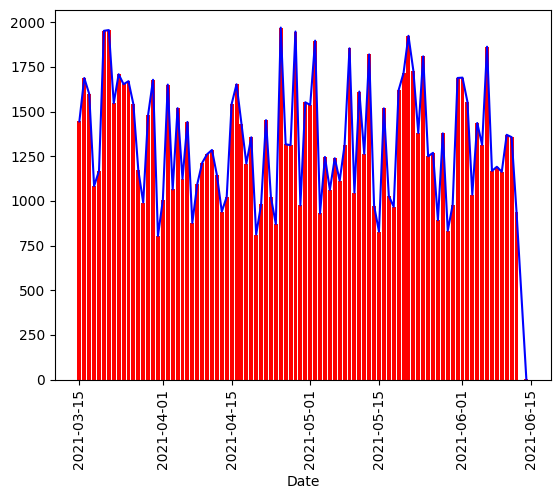

In [12]:
import matplotlib.pyplot as plt
total_sale_prices_by_date = transactions_df.groupby("date")["price"].sum()
total_sales_by_date = transactions_df.groupby("date")["price"].count()  

fig, ax = plt.subplots()

ax.plot(total_sale_prices_by_date.index, total_sales_by_date.values, color="b")
ax.bar(total_sales_by_date.index, total_sales_by_date.values, color='r')
ax.set_xlabel('Date')
plt.xticks(rotation=90)

plt.show()

## Connecting to an ORM 

As software engineers, we're somewhat alergic to SQL and working directly with databases. This is where ORMs come into play.

An ORM (Object Relational Mapper) is a tool that allows you to map you Python classes to database tables. ORMs allow you to perform all of the database operations that you need to perform without having to write any SQL which can be really convenient especially if your applications are OOP, when you build an OOP application that connects to a database, you need to create classes that map to the tables, connecting to SQL directly adds more operations that you need to perform as you would need to write the statement for performing CRUD operations. With an ORM, you just need to plug the existing model classes in your application to the ORM and you're ready to go.

Some Python Frameworks like Django will include their own built in ORMs, but one popular ORM that you can use for any Python project is `sqlalchemy` which can be installed using `pip install sqlalchemy`

In [18]:
from sqlalchemy import create_engine, ForeignKey
from sqlalchemy import Column, Integer, String, CHAR, Date
from sqlalchemy.orm import DeclarativeBase
from sqlalchemy.orm import sessionmaker

class Base(DeclarativeBase):
    pass

class Person(Base):
    __tablename__ = 'person' # Required, name of the table
    id = Column(Integer, primary_key=True)
    name = Column(String(50))
    fullname = Column(String(50))
    nickname = Column(String(50))

    def __init__(self, name, fullname, nickname):
        self.name = name
        self.fullname = fullname
        self.nickname = nickname

    def __repr__(self):
        return f"<Person(name={self.name}, fullname={self.fullname}, nickname={self.nickname})>"
    

engine = create_engine('sqlite:///people.db', echo=True) # The database we want to use (sqlite) and th e name of the file (people.db)
Base.metadata.create_all(bind=engine) # connects all of the databases that connect to the base 

Session = sessionmaker(bind=engine)
session = Session()

person = Person('Jack', 'Jack Smith', 'Jackie') # Crate our person object
session.add(person) # Write the person to the database
session.commit() # Commit the changes to the database



2024-02-13 11:14:37,221 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-02-13 11:14:37,222 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("person")
2024-02-13 11:14:37,223 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-02-13 11:14:37,224 INFO sqlalchemy.engine.Engine COMMIT
2024-02-13 11:14:37,227 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-02-13 11:14:37,229 INFO sqlalchemy.engine.Engine INSERT INTO person (name, fullname, nickname) VALUES (?, ?, ?)
2024-02-13 11:14:37,229 INFO sqlalchemy.engine.Engine [generated in 0.00067s] ('Jack', 'Jack Smith', 'Jackie')
2024-02-13 11:14:37,231 INFO sqlalchemy.engine.Engine COMMIT


If you would like more detailed steps on how to us `sqlalchemy` you can take a look at this video [Link](https://www.youtube.com/watch?v=AKQ3XEDI9Mw).

Lets add a bunch of people and read from the database.

In [19]:
people = [
    Person('Matthew', 'Matthew Sanders ', 'M. Shadows'),
    Person('James', 'James Sullivan', 'The Rev'),
    Person('Brian', 'Brian Haner ', 'Synyster Gates'),
    Person('Zachary', 'Zachary Baker ', 'Synyster Gates'),
    Person('Jonathan', 'Jonathan Seward', 'Johnny Christ'),
]

for person in people:
    session.add(person)

session.commit()

2024-02-13 11:27:11,922 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-02-13 11:27:11,925 INFO sqlalchemy.engine.Engine INSERT INTO person (name, fullname, nickname) VALUES (?, ?, ?) RETURNING id
2024-02-13 11:27:11,926 INFO sqlalchemy.engine.Engine [generated in 0.00014s (insertmanyvalues) 1/5 (ordered; batch not supported)] ('Matthew', 'Matthew Sanders ', 'M. Shadows')
2024-02-13 11:27:11,928 INFO sqlalchemy.engine.Engine INSERT INTO person (name, fullname, nickname) VALUES (?, ?, ?) RETURNING id
2024-02-13 11:27:11,930 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/5 (ordered; batch not supported)] ('James', 'James Sullivan', 'The Rev')
2024-02-13 11:27:11,931 INFO sqlalchemy.engine.Engine INSERT INTO person (name, fullname, nickname) VALUES (?, ?, ?) RETURNING id
2024-02-13 11:27:11,932 INFO sqlalchemy.engine.Engine [insertmanyvalues 3/5 (ordered; batch not supported)] ('Brian', 'Brian Haner ', 'Synyster Gates')
2024-02-13 11:27:11,934 INFO sqlalchemy.engine.Engine INSERT I

In [20]:
all_people = session.query(Person).all()
print(all_people)

2024-02-13 11:28:44,506 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-02-13 11:28:44,509 INFO sqlalchemy.engine.Engine SELECT person.id AS person_id, person.name AS person_name, person.fullname AS person_fullname, person.nickname AS person_nickname 
FROM person
2024-02-13 11:28:44,510 INFO sqlalchemy.engine.Engine [generated in 0.00119s] ()
[<Person(name=Jack, fullname=Jack Smith, nickname=Jackie)>, <Person(name=Matthew, fullname=Matthew Sanders , nickname=M. Shadows)>, <Person(name=James, fullname=James Sullivan, nickname=The Rev)>, <Person(name=Brian, fullname=Brian Haner , nickname=Synyster Gates)>, <Person(name=Zachary, fullname=Zachary Baker , nickname=Synyster Gates)>, <Person(name=Jonathan, fullname=Jonathan Seward, nickname=Johnny Christ)>]


In [27]:
the_rev = session.query(Person).where(Person.name == 'James').first()
print("Name:", the_rev.name)
print("Full Name:", the_rev.fullname)
print("Nickname:", the_rev.nickname)

2024-02-13 11:32:02,368 INFO sqlalchemy.engine.Engine SELECT person.id AS person_id, person.name AS person_name, person.fullname AS person_fullname, person.nickname AS person_nickname 
FROM person 
WHERE person.name = ?
 LIMIT ? OFFSET ?
2024-02-13 11:32:02,369 INFO sqlalchemy.engine.Engine [cached since 73.55s ago] ('James', 1, 0)
Name: James
Full Name: James Sullivan
Nickname: The Rev
